# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch


### Necessary Imports

In [38]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [39]:
import os
from google.colab import drive

ModuleNotFoundError: No module named 'google.colab'

### Download The Dataset & Define The Transforms

In [40]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### Exploring The Data

In [41]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


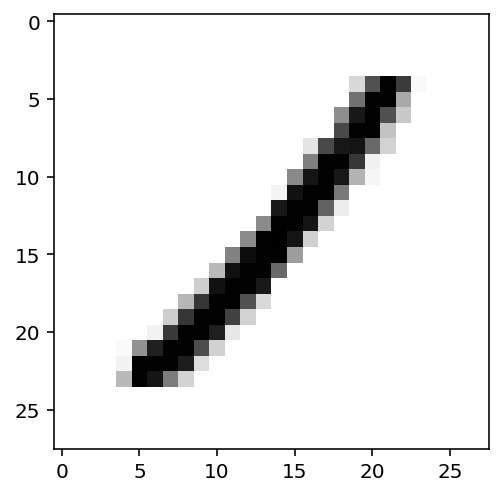

In [42]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

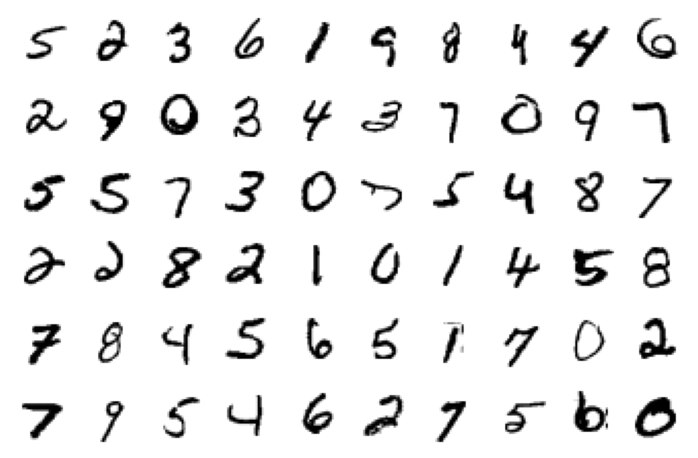

In [43]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [44]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [45]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [46]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 2.6504e-03,  2.6504e-03,  2.6504e-03,  ...,  2.6504e-03,
          2.6504e-03,  2.6504e-03],
        [ 3.0373e-03,  3.0373e-03,  3.0373e-03,  ...,  3.0373e-03,
          3.0373e-03,  3.0373e-03],
        [-1.4153e-03, -1.4153e-03, -1.4153e-03,  ..., -1.4153e-03,
         -1.4153e-03, -1.4153e-03],
        ...,
        [-9.3980e-05, -9.3980e-05, -9.3980e-05,  ..., -9.3980e-05,
         -9.3980e-05, -9.3980e-05],
        [ 4.6551e-04,  4.6551e-04,  4.6551e-04,  ...,  4.6551e-04,
          4.6551e-04,  4.6551e-04],
        [-2.1310e-03, -2.1310e-03, -2.1310e-03,  ..., -2.1310e-03,
         -2.1310e-03, -2.1310e-03]])


In [47]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [48]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0024,  0.0050, -0.0044,  ...,  0.0209, -0.0185,  0.0108],
        [-0.0200,  0.0050,  0.0210,  ..., -0.0124,  0.0345, -0.0354],
        [-0.0191,  0.0203,  0.0009,  ...,  0.0115, -0.0140,  0.0059],
        ...,
        [ 0.0196, -0.0190,  0.0253,  ...,  0.0162, -0.0136, -0.0044],
        [-0.0340, -0.0058,  0.0086,  ...,  0.0118,  0.0197,  0.0237],
        [ 0.0186,  0.0331,  0.0279,  ...,  0.0091,  0.0186, -0.0248]],
       requires_grad=True)
Gradient - tensor([[-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        ...,
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010]])


In [49]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0024,  0.0050, -0.0044,  ...,  0.0209, -0.0185,  0.0108],
        [-0.0199,  0.0050,  0.0210,  ..., -0.0124,  0.0345, -0.0354],
        [-0.0191,  0.0203,  0.0009,  ...,  0.0115, -0.0140,  0.0059],
        ...,
        [ 0.0196, -0.0190,  0.0253,  ...,  0.0162, -0.0136, -0.0044],
        [-0.0340, -0.0058,  0.0086,  ...,  0.0118,  0.0197,  0.0237],
        [ 0.0186,  0.0330,  0.0279,  ...,  0.0091,  0.0186, -0.0248]],
       requires_grad=True)


### Core Training Of Neural Network

In [50]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6373313519476193
Epoch 1 - Training loss: 0.28247788753400227
Epoch 2 - Training loss: 0.2229545742178014
Epoch 3 - Training loss: 0.18022169666424362
Epoch 4 - Training loss: 0.15147169034229094
Epoch 5 - Training loss: 0.13057831197635514
Epoch 6 - Training loss: 0.1144440804542636
Epoch 7 - Training loss: 0.10139859918661828
Epoch 8 - Training loss: 0.09089294677999403
Epoch 9 - Training loss: 0.08269617395914361
Epoch 10 - Training loss: 0.0753448192409472
Epoch 11 - Training loss: 0.06949989710485678
Epoch 12 - Training loss: 0.06370848644329215
Epoch 13 - Training loss: 0.05819082614093987
Epoch 14 - Training loss: 0.053583025100774

Training Time (in minutes) = 5.7456955194473265


In [51]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 3


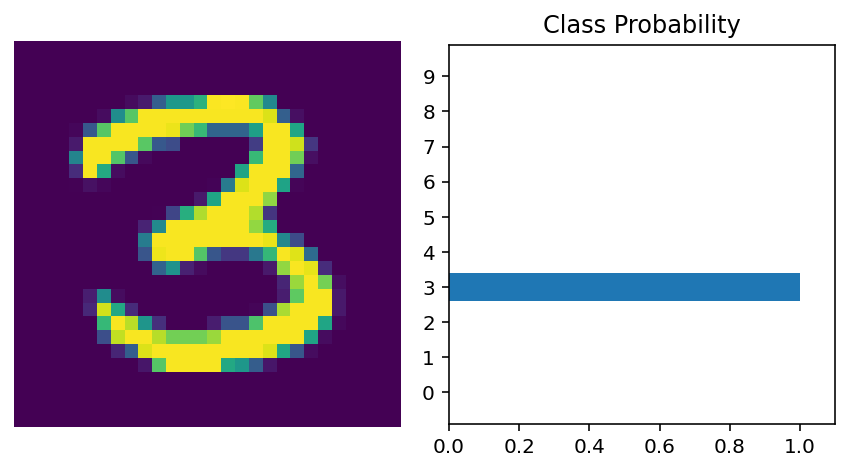

In [61]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [15]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9739


In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
import os
from torchvision import datasets, transforms
from torch import nn
from torch import optim
import torch.nn.functional as F

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.lin1 = nn.Linear(784, 128)
        self.lin2 = nn.Linear(128, 64)
        self.lin3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = F.log_softmax(self.lin3(x), dim=1)
        return x


cnn = Model()
optimizer = optim.SGD(cnn.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
criterion = nn.NLLLoss()

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = cnn(images)

        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

torch.save(nn.state_dict(), "weights.pt")
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.649518412853609
Epoch 1 - Training loss: 0.2812818551797475
Epoch 2 - Training loss: 0.22236884035058876
Epoch 3 - Training loss: 0.17888660501363055
Epoch 4 - Training loss: 0.14882025673493013
Epoch 5 - Training loss: 0.1281093533482474
Epoch 6 - Training loss: 0.11274394493148938
Epoch 7 - Training loss: 0.09940167110977269
Epoch 8 - Training loss: 0.0896833584304335
Epoch 9 - Training loss: 0.08127155987176496
Epoch 10 - Training loss: 0.07382058526557098
Epoch 11 - Training loss: 0.06710551851002106
Epoch 12 - Training loss: 0.06113305305322406
Epoch 13 - Training loss: 0.056922983924008366
Epoch 14 - Training loss: 0.05186330078582742


AttributeError: module 'torch.nn' has no attribute 'state_dict'